В искусственном интеллекте и машинном обучении — задача разделения множества наблюдений (объектов) на группы, называемые классами, на основе анализа их формального описания. При классификации каждая единица наблюдения относится определенной группе или номинальной категории на основе некоторого качественного свойства.

Задача классификации применяется во многих областях:

- в торговле — классификация клиентов и товаров позволяет оптимизировать маркетинговые стратегии, стимулировать продажи, сокращать издержки

- в сфере телекоммуникаций — классификация абонентов позволяет определять уровень лояльности, разрабатывать программы лояльности

- в медицине и здравоохранении — диагностика заболеваний, классификация населения по группам риска

- в банковской сфере — кредитный скоринг.

In [1]:
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Pregnancies: количество беременностей

Glucose: концентрация глюкозы в плазме через 2 часа в пероральном тесте на толерантность к глюкозе.

BloodPressure: диастолическое артериальное давление

SkinThickness: толщина кожной складки трицепса

Insulin: инсулин сыворотки после приема пищи

BMI: индекс массы тела

DiabetesPedigreeFunction: функция диабетической семьи

Age: Возраст

diabetes: цель, 0 означает отсутствие болезни, 1 означает болезнь

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df["diabetes"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [5]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

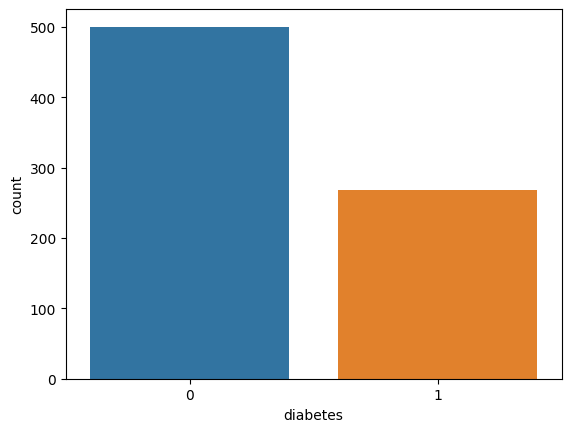

In [6]:
import seaborn as sns

sns.countplot(df, x="diabetes")

#### Заполнение пропусков медианой

In [7]:
df_temp = df.drop(["Pregnancies", "diabetes"], axis=1)
df_temp

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [8]:
median = df_temp.median()
median

Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [9]:
df_without_zero = df_temp.replace(0, median)
df_without_zero

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,30.5,33.6,0.627,50
1,85,66,29,30.5,26.6,0.351,31
2,183,64,23,30.5,23.3,0.672,32
3,89,66,23,94.0,28.1,0.167,21
4,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63
764,122,70,27,30.5,36.8,0.340,27
765,121,72,23,112.0,26.2,0.245,30
766,126,60,23,30.5,30.1,0.349,47


In [10]:
df_without_zero["Pregnancies"] = df["Pregnancies"]
df_without_zero["diabetes"] = df["diabetes"]
df_without_zero

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,diabetes
0,148,72,35,30.5,33.6,0.627,50,6,1
1,85,66,29,30.5,26.6,0.351,31,1,0
2,183,64,23,30.5,23.3,0.672,32,8,1
3,89,66,23,94.0,28.1,0.167,21,1,0
4,137,40,35,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,10,0
764,122,70,27,30.5,36.8,0.340,27,2,0
765,121,72,23,112.0,26.2,0.245,30,5,0
766,126,60,23,30.5,30.1,0.349,47,1,1


In [11]:
df_without_zero.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,diabetes
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
diabetes,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


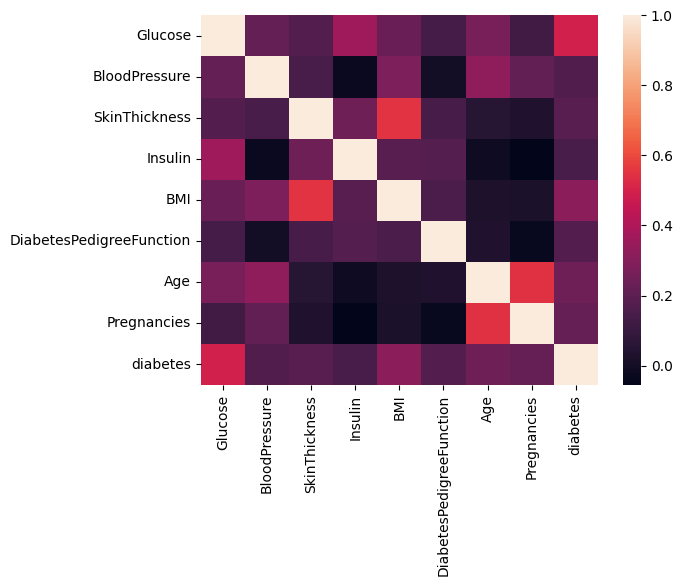

In [14]:
sns.heatmap(df_without_zero.corr()); #визуал корреляции

In [15]:
sns.pairplot(data=df_without_zero, diag_kind="kde", hue="diabetes") #визуал связи между переменными

Output hidden; open in https://colab.research.google.com to view.

![image.png](attachment:image.png)

Важная проблема - переобучение

![image.png](attachment:image.png)

Разделим на две части и обучим knn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_without_zero.drop(["diabetes"], axis=1)
y = df_without_zero["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score #проверка точности модели

accuracy_score(y_test, y_pred)

0.7207792207792207

Как выглядит перекрестная проверка

![image.png](attachment:image.png)

Как реализовать перекрестную проверку

In [34]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(i)
    print(train_index)

KFold(n_splits=3, random_state=None, shuffle=False)
0
[256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 4

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3) #чем больше разделений на проверки, тем выше точность модели
scores

array([0.7109375 , 0.70703125, 0.703125  ])

In [36]:
np.mean(scores)

0.70703125

А если у модели есть гиперпараметры?

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Подбор параметров с кросс валидацией

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [40]:
from sklearn.model_selection import GridSearchCV #метод ближайшего соседа по метрике расстояний (чем ближе, тем больше вес)

In [42]:
n_neighbors = list(range(1, 31)) #создание объекта
weights = ["uniform", "distance"]
p = [1, 2, 3, 4] #расстояние от объекта

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)
hyperparameters

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['uniform', 'distance'],
 'p': [1, 2, 3, 4]}

In [45]:
model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=2) #метод ближайшего соседа по методу расстояний

In [46]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [48]:
model = search.best_estimator_ #сохранение лучшей модели
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7207792207792207

Добавим нормализацию

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
search.fit(X_train_scaled, y_train)

model = search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7597402597402597

Преобразуем к стандартному виду

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
search.fit(X_train_scaled, y_train)

model = search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7597402597402597

In [51]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

Нарисуем матрицу ошибок

![image.png](attachment:image.png)

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #матрица ошибок

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 15],
       [22, 31]])

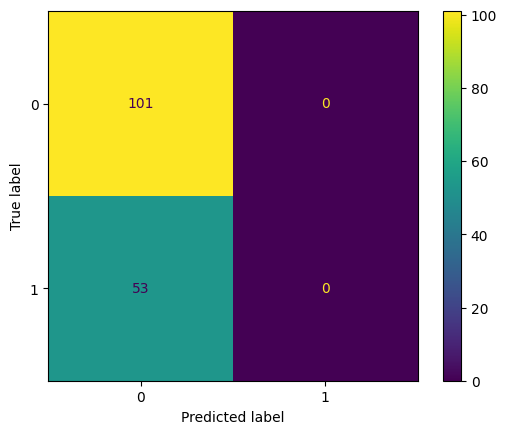

In [149]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

In [59]:
model.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [58]:
model.predict_proba(X_test_scaled) #увереность модели в распределении по классам

array([[0.70588235, 0.29411765],
       [0.94117647, 0.05882353],
       [0.82352941, 0.17647059],
       [0.52941176, 0.47058824],
       [0.35294118, 0.64705882],
       [0.94117647, 0.05882353],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.94117647, 0.05882353],
       [0.35294118, 0.64705882],
       [0.52941176, 0.47058824],
       [0.82352941, 0.17647059],
       [0.23529412, 0.76470588],
       [0.52941176, 0.47058824],
       [0.64705882, 0.35294118],
       [0.23529412, 0.76470588],
       [0.70588235, 0.29411765],
       [0.35294118, 0.64705882],
       [1.        , 0.        ],
       [0.70588235, 0.29411765],
       [1.        , 0.        ],
       [0.52941176, 0.47058824],
       [0.29411765, 0.70588235],
       [0.64705882, 0.35294118],
       [0.23529412, 0.76470588],
       [0.58823529, 0.41176471],
       [0.58823529, 0.41176471],
       [0.82352941, 0.17647059],
       [0.94117647, 0.05882353],
       [0.94117647, 0.05882353],
       [0.

In [148]:
model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [146]:
ths = 0.7 # порог вероятности в классу
props = model.predict_proba(X_test_scaled)[:, 1]
(props > ths) * 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


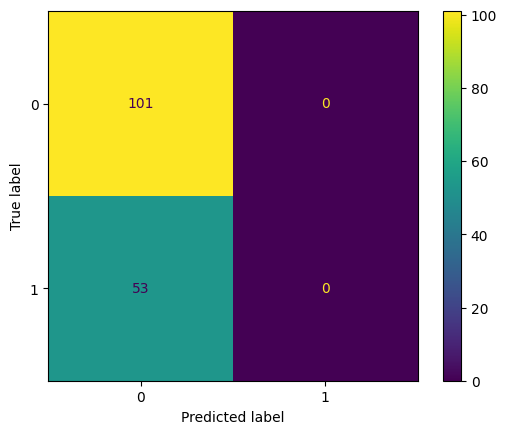

In [147]:
ths = 0.4
props = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (props > ths) * 1
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

In [81]:
from sklearn.metrics import roc_curve, auc #расчет порога для точности модели


In [88]:
props = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thrs = roc_curve(y_test, props) # показатель процента среди верно предсказанных моделью - tpr, frp - ложно предсказзных
roc_auc = auc(fpr, tpr)

In [83]:
fpr

array([0.        , 0.        , 0.00990099, 0.01980198, 0.02970297,
       0.07920792, 0.08910891, 0.14851485, 0.1980198 , 0.27722772,
       0.35643564, 0.44554455, 0.51485149, 0.62376238, 0.72277228,
       0.82178218, 1.        ])

In [84]:
tpr

array([0.        , 0.01886792, 0.05660377, 0.11320755, 0.24528302,
       0.39622642, 0.47169811, 0.58490566, 0.66037736, 0.75471698,
       0.86792453, 0.90566038, 0.94339623, 0.94339623, 0.96226415,
       0.96226415, 1.        ])

In [85]:
thrs

array([1.88235294, 0.88235294, 0.82352941, 0.76470588, 0.70588235,
       0.64705882, 0.58823529, 0.52941176, 0.47058824, 0.41176471,
       0.35294118, 0.29411765, 0.23529412, 0.17647059, 0.11764706,
       0.05882353, 0.        ])

In [89]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'False positive rate')

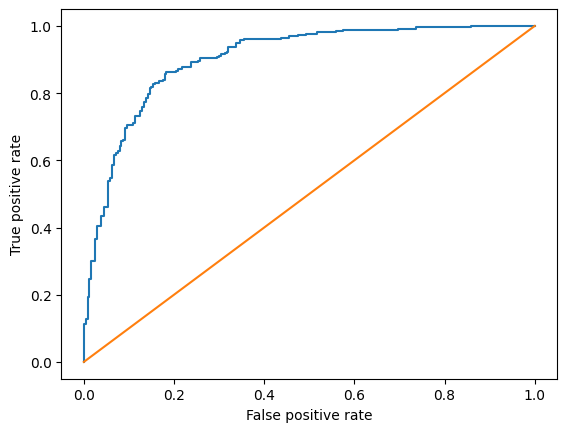

In [144]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
TPR = TP / (TP + FN).

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
FPR = FP / (FP + TN).

In [ ]:
#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# разделяем его на 2 выборки
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
#model = LogisticRegression(solver='lbfgs')
#model.fit(trainX, trainy)
# получаем предказания
#lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
#lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
#lr_auc = roc_auc_score(testy, lr_probs)
#print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
#fpr, tpr, treshold = roc_curve(testy, lr_probs)
#roc_auc = auc(fpr, tpr)
# строим график
#plt.plot(fpr, tpr, color='darkorange',
#         label='ROC кривая (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Пример ROC-кривой')
#plt.legend(loc="lower right")
#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


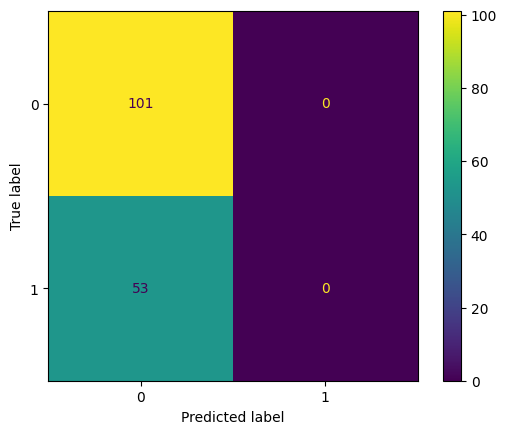

In [143]:
ths = 0.42
props = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (props > ths) * 1
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

https://pythonru.com/baza-znanij/sklearn-roc-auc

Порог можно менять

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
y_pred = model.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred)

0.7077922077922078

In [141]:
grid = {
    "max_features": ["sqrt", "log2"],
    "max_depth": list(range(1, 30)),
    "criterion": ["gini", "entropy"]
}
grid

{'max_features': ['sqrt', 'log2'],
 'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'criterion': ['gini', 'entropy']}

In [155]:
search = GridSearchCV(DecisionTreeClassifier(), grid, n_jobs=10, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'max_features': ['sqrt', 'log2']},
             verbose=1)

In [165]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}

In [191]:
model = search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [192]:
from sklearn import tree

print(tree.export_text(model, feature_names = list(X_test.columns)))

|--- SkinThickness <= 21.50
|   |--- Glucose <= 143.50
|   |   |--- Age <= 27.50
|   |   |   |--- class: 0
|   |   |--- Age >  27.50
|   |   |   |--- class: 0
|   |--- Glucose >  143.50
|   |   |--- BMI <= 25.70
|   |   |   |--- class: 0
|   |   |--- BMI >  25.70
|   |   |   |--- class: 1
|--- SkinThickness >  21.50
|   |--- Glucose <= 127.50
|   |   |--- Pregnancies <= 4.50
|   |   |   |--- class: 0
|   |   |--- Pregnancies >  4.50
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- BMI <= 30.20
|   |   |   |--- class: 0
|   |   |--- BMI >  30.20
|   |   |   |--- class: 1



[Text(0.5, 0.875, 'SkinThickness <= 21.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(0.25, 0.625, 'Glucose <= 143.5\ngini = 0.256\nsamples = 106\nvalue = [90, 16]'),
 Text(0.125, 0.375, 'Age <= 27.5\ngini = 0.137\nsamples = 95\nvalue = [88, 7]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 61\nvalue = [60, 1]'),
 Text(0.1875, 0.125, 'gini = 0.291\nsamples = 34\nvalue = [28, 6]'),
 Text(0.375, 0.375, 'BMI <= 25.7\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.625, 'Glucose <= 127.5\ngini = 0.477\nsamples = 508\nvalue = [309, 199]'),
 Text(0.625, 0.375, 'Pregnancies <= 4.5\ngini = 0.344\nsamples = 308\nvalue = [240, 68]'),
 Text(0.5625, 0.125, 'gini = 0.265\nsamples = 197\nvalue = [166, 31]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 111\nvalue = [74, 37]'),
 Text(0.875, 0.375, 'BMI <= 30.2\ngini = 0.452\nsamples = 200\nval

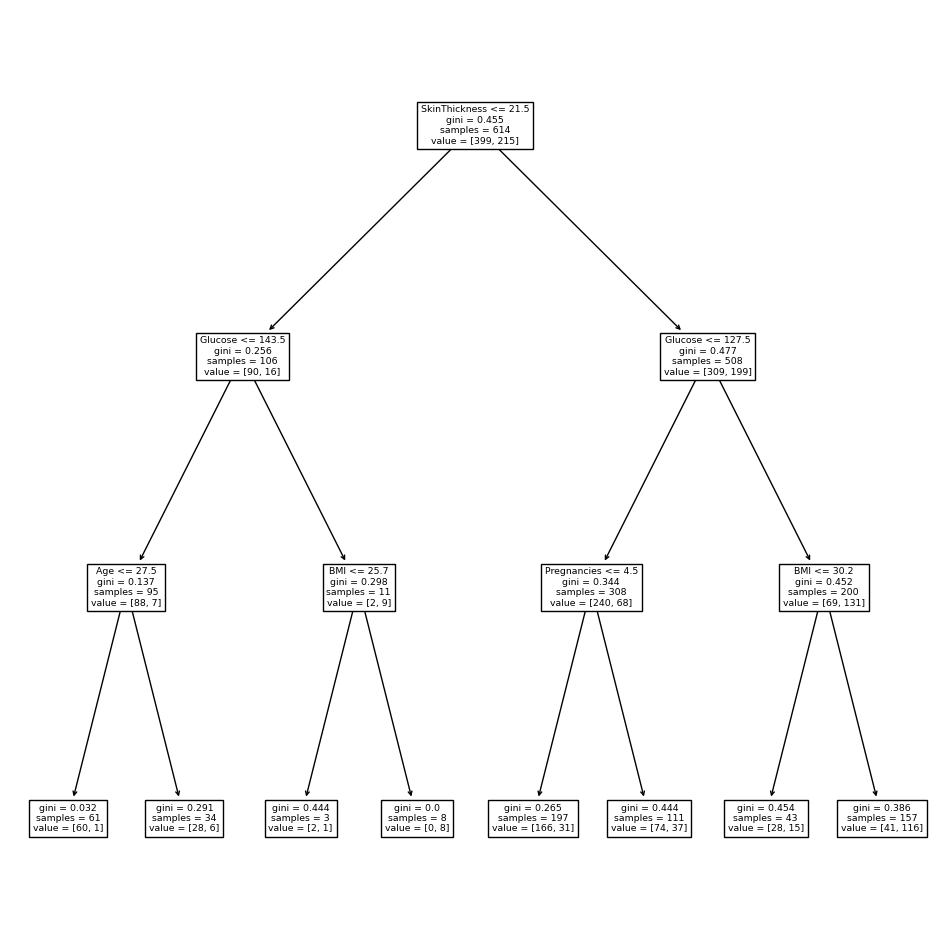

In [194]:
plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=list(X_test.columns))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.934\nsamples = 614\nvalue = [399, 215]'),
 Text(0.25, 0.625, 'Pregnancies <= 3.5\nentropy = 0.7\nsamples = 391\nvalue = [317, 74]'),
 Text(0.125, 0.375, 'DiabetesPedigreeFunction <= 0.674\nentropy = 0.523\nsamples = 238\nvalue = [210, 28]'),
 Text(0.0625, 0.125, 'entropy = 0.469\nsamples = 190\nvalue = [171, 19]'),
 Text(0.1875, 0.125, 'entropy = 0.696\nsamples = 48\nvalue = [39, 9]'),
 Text(0.375, 0.375, 'BMI <= 26.35\nentropy = 0.882\nsamples = 153\nvalue = [107, 46]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.963\nsamples = 119\nvalue = [73, 46]'),
 Text(0.75, 0.625, 'Age <= 24.5\nentropy = 0.949\nsamples = 223\nvalue = [82, 141]'),
 Text(0.625, 0.375, 'SkinThickness <= 22.5\nentropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.998\nsamples = 36\nvalue = [19, 17]'),
 Text(0.

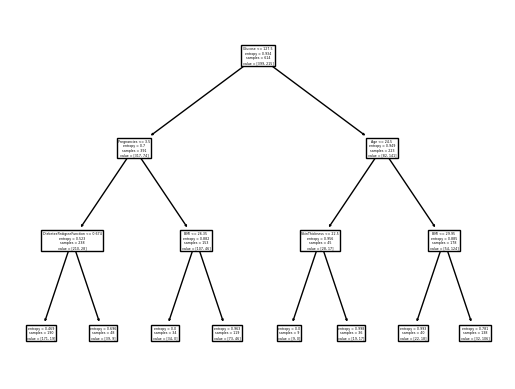

In [195]:
grid = {
    "max_features": ["sqrt", "log2"],
    "max_depth": [1, 2, 3],
    "criterion": ["gini", "entropy"]
}
search = GridSearchCV(DecisionTreeClassifier(), grid, n_jobs=15, verbose=1)
search.fit(X_train, y_train)
model = search.best_estimator_
model.fit(X_train, y_train)

tree.plot_tree(model, feature_names=list(X_test.columns))

In [196]:
print(tree.export_text(model, feature_names=list(X_test.columns)))

|--- Glucose <= 127.50
|   |--- Pregnancies <= 3.50
|   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |--- class: 0
|   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |--- class: 0
|   |--- Pregnancies >  3.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- Age <= 24.50
|   |   |--- SkinThickness <= 22.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  22.50
|   |   |   |--- class: 0
|   |--- Age >  24.50
|   |   |--- BMI <= 29.95
|   |   |   |--- class: 0
|   |   |--- BMI >  29.95
|   |   |   |--- class: 1



In [197]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'}

In [198]:
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [199]:
search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

Построение дерева происходит по следующему алгоритму:

1. Выбирается признак, по которому происходит разделение выборки.
2. Выбирается пороговое значение для этого признака.
3. Разделяется выборка на две части: объекты, у которых значение признака меньше или равно порогу, и объекты, у которых значение признака больше порога.
4. Для каждой из двух полученных подвыборок рекурсивно повторяются шаги 1-3, пока не будет достигнут критерий останова (например, глубина дерева, количество объектов в листе и т.д.).
5. В листе дерева выводится ответ — класс.

Логистическая регрессия

#### Использование метода опорных векторов для классификации

![image.png](attachment:image.png)

In [200]:
from sklearn import svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7922077922077922

In [201]:
from sklearn import svm
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7922077922077922